In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import time
import random
import os

In [ ]:
url = "/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book.json"

with open(url,"r",encoding="utf-8") as f:
    data = json.load(f)

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  object 
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           46967 non-null  object 
 5   제목           49996 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          47002 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
# 책 소개 없는 애들만
x = data.loc[data['책소개'].isna(), ['ISBN']]

In [ ]:
x.reset_index(drop=True,inplace=True)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ISBN    2998 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [ ]:
def get_product_url_from_isbn(isbn):
    isbn_str = str(isbn)
    # ISBN을 URL의 keyword에 대입
    search_url = f"https://search.kyobobook.co.kr/search?keyword={isbn_str}&gbCode=TOT&target=total"
    response = requests.get(search_url)
    if response.status_code != 200:
        print(f"ISBN {isbn_str}: 상태 코드 {response.status_code}") # 에러날 시 에러코드 확인
        return None

    soup = BeautifulSoup(response.text, 'html.parser')

    # auto_overflow_wrap prod_name_group calss는 검색하는 ISBN이 없을 시 생성되지 않음 - 조건문으로 활용하여 None 반환
    container = soup.find("div", class_="auto_overflow_wrap prod_name_group")
    if container is None:
        print(f"ISBN {isbn_str}: 검색 결과 없음")
        return None

    # 생성된 페이지의 목표 태그(<a>---<href>)에서 URL만 추출 - 없으면 None 반환
    a_tag = container.find("a", href=True)
    if a_tag:
        product_url = a_tag.get('href')
        print(f"ISBN {isbn_str}: URL -> {product_url}")
        return product_url
    else:
        print(f"ISBN {isbn_str}: URL을 찾을 수 없음")
        return None

In [ ]:
x['url'] = x['ISBN'].apply(get_product_url_from_isbn)

ISBN 9788962515510: 상품 URL -> https://product.kyobobook.co.kr/detail/S000000969234
ISBN 9791186492369: 검색 결과 없음 (auto_overflow_wrap prod_name_group class 없음)
ISBN 9788928518357: 상품 URL -> https://product.kyobobook.co.kr/detail/S000201463394
ISBN 9791162431382: 상품 URL -> https://product.kyobobook.co.kr/detail/S000001812721
ISBN 9788915001275: 상품 URL -> https://product.kyobobook.co.kr/detail/S000202706008
ISBN 9788962397215: 상품 URL -> https://product.kyobobook.co.kr/detail/S000000966896
ISBN 9791137225138: 상품 URL -> https://product.kyobobook.co.kr/detail/S000060614084
ISBN 9788952785688: 상품 URL -> https://product.kyobobook.co.kr/detail/S000000734814
ISBN 9791137210981: 상품 URL -> https://product.kyobobook.co.kr/detail/S000060611981
ISBN 9791190145657: 상품 URL -> https://product.kyobobook.co.kr/detail/S000001936018
ISBN 9791127296377: 상품 URL -> https://product.kyobobook.co.kr/detail/S000060610785
ISBN 9791160455908: 검색 결과 없음 (auto_overflow_wrap prod_name_group class 없음)
ISBN 9791137267169: 

In [ ]:
# 책소개 없는 ISBN - url 데이터 저장
file_path = "/content/drive/MyDrive/aiffel_final_project/data_renew/x_url.csv"

pd.DataFrame(x).to_csv(file_path, index=False)

In [ ]:
x['url'].isna().sum()

499

### 이미 존재하는 책 소개 row

In [ ]:
!pip install selenium
!apt-get update
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 25.2 MB/s eta 0:00:00
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
import random

#### 분류

In [ ]:
# Selenium 설정 (Colab 환경 등)
chrome_options = Options()
chrome_options.add_argument("--headless")           # 헤드리스 모드
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")

driver = webdriver.Chrome(options=chrome_options)

def extract_category(url):
    """
    주어진 URL에 대해 랜덤 딜레이 후 Selenium으로 상세페이지에 접속하고,
    BeautifulSoup을 사용해 카테고리 정보를 추출하여
    ">국내도서>시/에세이>한국시>현대시" 형태의 문자열을 반환합니다.
    """
    # 랜덤 딜레이 (3 ~ 7초)
    delay = random.uniform(3, 7)
    time.sleep(delay)

    driver.get(url)
    # 페이지 완전 로드를 위한 대기 (필요 시 조정)
    time.sleep(6)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    ul = soup.select_one('#scrollSpyProdInfo > div:nth-of-type(4) > div:nth-of-type(1) > ul')
    if ul:
        links = ul.select("a.intro_category_link")
        categories = [link.get_text(strip=True) for link in links]
        return ">" + ">".join(categories)
    else:
        return None

In [ ]:
# x['url']가 존재하고 x['분류']가 null인 행들만 선택
mask = x['url'].notnull() & x['분류'].isnull()
target_indices = x[mask].index.tolist()

print(f"전체 처리 대상 개수: {len(target_indices)}")

# 한 번에 3개씩 배치 처리 혹시 모를 트래픽
batch_size = 3
total = len(target_indices)

for i in range(0, total, batch_size):
    batch_indices = target_indices[i:i+batch_size]
    print(f"배치 {i//batch_size+1} 처리 중 (총 {len(batch_indices)}개)...")
    for idx in batch_indices:
        url = x.loc[idx, 'url']
        category_info = extract_category(url)
        x.loc[idx, '분류'] = category_info
        print(f"인덱스 {idx} | URL: {url} -> 분류: {category_info}")
    print(f"배치 {i//batch_size+1} 처리 완료, 다음 배치 전 7초 대기...")
    time.sleep(7)

driver.quit()

전체 처리 대상 개수: 88
배치 1 처리 중 (총 3개)...
인덱스 16 | URL: https://product.kyobobook.co.kr/detail/S000061695386 -> 분류: >국내도서>취업/수험서>전문직자격증>행정사
인덱스 31 | URL: https://product.kyobobook.co.kr/detail/S000000902976 -> 분류: >국내도서>정치/사회>법학>소송/판례>민사소송(법)>국내도서>정치/사회>대학교재>법학>국내도서>대학교재>정치/사회/법>법학
인덱스 75 | URL: https://product.kyobobook.co.kr/detail/S000000902909 -> 분류: >국내도서>과학>교양과학>교양생물>생물이야기
배치 1 처리 완료, 다음 배치 전 7초 대기...
배치 2 처리 중 (총 3개)...
인덱스 131 | URL: https://product.kyobobook.co.kr/detail/S000061425529 -> 분류: >국내도서>취업/수험서>전문직자격증>변리사
인덱스 141 | URL: https://product.kyobobook.co.kr/detail/S000001764248 -> 분류: >국내도서>기술/공학>의학>보건학>보건의료법규>국내도서>기술/공학>대학교재>의학>국내도서>대학교재>기술공학>의학
인덱스 147 | URL: https://product.kyobobook.co.kr/detail/S000061694344 -> 분류: >국내도서>정치/사회>법학>상법>특허/상표/지식재산/저작권
배치 2 처리 완료, 다음 배치 전 7초 대기...
배치 3 처리 중 (총 3개)...
인덱스 151 | URL: https://product.kyobobook.co.kr/detail/S000201274208 -> 분류: >국내도서>경제/경영>세무/회계>양도/소득/재산세>국내도서>경제/경영>대학교재>국내도서>대학교재>경제/경영
인덱스 154 | URL: https://ebook-product.kyobobook

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    2998 non-null   int64 
 1   url     2499 non-null   object
 2   책소개     873 non-null    object
 3   출판사리뷰   352 non-null    object
 4   분류      2973 non-null   object
 5   목차      1714 non-null   object
dtypes: int64(1), object(5)
memory usage: 140.7+ KB


#### 책소개

In [ ]:
file_path = "/content/drive/MyDrive/aiffel_final_project/data_renew/x_url.csv"

pd.DataFrame(x).to_csv(file_path, index=False)

In [ ]:
import time
import random
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

# Selenium 설정 (Chrome headless 모드)
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
driver = webdriver.Chrome(options=chrome_options)

def extract_book_intro(url):
    """
    주어진 URL에 대해 랜덤 딜레이 후 Selenium으로 상세페이지에 접속하고,
    XPath 영역
       //*[@id="scrollSpyProdInfo"]/div[4]/div[2]
    와
       //*[@id="scrollSpyProdInfo"]/div[5]/div[2]
    내에서 클래스가 "info_text fw_bold" 또는 "info_text"인 모든 div 요소(또는 해당 요소 내의 텍스트 노드)를
    순차적으로 이어붙여 하나의 문자열로 반환.

    만약 두 영역 모두에서 해당 클래스 요소가 전혀 없다면, return None
    """
    # 호출 제한 피하기
    time.sleep(random.uniform(1, 2))

    driver.get(url)
    # 페이지가 완전히 로드될 때까지 대기 시간 1초
    time.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # 2개의 XPATH
    containers = []
    container4 = soup.select_one('#scrollSpyProdInfo > div:nth-of-type(4) > div:nth-of-type(2)')
    container5 = soup.select_one('#scrollSpyProdInfo > div:nth-of-type(5) > div:nth-of-type(2)')
    if container4:
        containers.append(container4)
    if container5:
        containers.append(container5)

    # 두 영역에서 "info_text" 관련 요소(예: "info_text fw_bold" 또는 "info_text") 두 개의 텍스트 선택 추출
    texts = []
    for cont in containers:
        divs = cont.find_all("div", class_=lambda c: c and "info_text" in c)
        if divs:
            for div in divs:
                texts.extend(list(div.stripped_strings))

    if texts:
        return " ".join(texts)
    else:
        return None

In [ ]:
# 재실행 시작 인덱스
start_index = 217

# x['url']가 존재하고 x['책소개']가 null인 행들 중에서 인덱스가 start_index 이상인 경우 선택
mask = x['url'].notnull() & x['책소개'].isnull() & (x.index >= start_index)
target_indices = x[mask].index.tolist()

print(f"남은 처리 데이터 수 (인덱스 {start_index}부터): {len(target_indices)}")

# batch 10개씩 - 호출 제한 피하기
batch_size = 10
total = len(target_indices)

for i in range(0, total, batch_size):
    batch_indices = target_indices[i:i+batch_size]
    print(f"배치 {i//batch_size+1} 처리 중 (총 {len(batch_indices)}개)...")
    for idx in batch_indices:
        url = x.loc[idx, 'url']
        intro_text = extract_book_intro(url)
        x.loc[idx, '책소개'] = intro_text
        print(f"인덱스 {idx} | URL: {url} -> 책소개: {intro_text}")
    print(f"배치 {i//batch_size+1} 처리 완료, 다음 배치 전 1초 대기...")
    time.sleep(1)

driver.quit()

전체 처리 대상 개수 (인덱스 217부터): 1535
배치 1 처리 중 (총 10개)...
인덱스 217 | URL: https://product.kyobobook.co.kr/detail/S000200551569 -> 책소개: 2020년 초부터 전 세계적으로 확산된 코로나는 우리나라 정치, 경제, 사회, 문화 등 모든 분야에 영향을 미쳤다. 거리두기 영향과 대인접촉 기피현상으로 재택근무가 늘어나고, 각종 모임과 행사 및 회식이 줄어드는 등 큰 사회적 변화를 겪었다. 코로나 영향으로 부동산 시장도 큰 영향을 받았다.
인덱스 219 | URL: https://product.kyobobook.co.kr/detail/S000201408366 -> 책소개: None
인덱스 220 | URL: https://product.kyobobook.co.kr/detail/S000201054243 -> 책소개: 이 책은 사회복지학을 다룬 이론서이다. 알면서도 몰랐던 장애의 기초적이고 전반적인 내용을 학습할 수 있도록 구성하였다.
인덱스 228 | URL: https://product.kyobobook.co.kr/detail/S000200152387 -> 책소개: None
인덱스 229 | URL: https://product.kyobobook.co.kr/detail/S000200367257 -> 책소개: 독자대상 : 경찰공무원 시험 준비생 구성 : 이론
인덱스 230 | URL: https://product.kyobobook.co.kr/detail/S000061695353 -> 책소개: 이 책은 소박한 민속과 민가의 향기 3를 다룬 한옥건축서적이다. 소박한 민속과 민가의 향기 3에 관한 기초적이고 전반적인 내용들이 수록되어 있다.
인덱스 236 | URL: https://product.kyobobook.co.kr/detail/S000001984653 -> 책소개: 『어도비 포토샵CC』는 〈포토샵 튜닝〉, 〈환경설정〉, 〈스크레치 디스크〉, 〈사진 촬영 기법과 포토샵〉, 〈이미지 해

In [ ]:
naru = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250306.csv")

In [ ]:
x = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/x_url.csv")

In [ ]:
naru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          47891 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    2998 non-null   int64 
 1   url     2499 non-null   object
 2   책소개     2240 non-null   object
 3   출판사리뷰   352 non-null    object
 4   분류      2973 non-null   object
 5   목차      1714 non-null   object
dtypes: int64(1), object(5)
memory usage: 140.7+ KB


### 병합

In [ ]:
# 책소개 채기
if '책소개' in naru.columns and '책소개' in x.columns:
    # ISBN을 기준으로 x를 딕셔너리로 변환
    isbn_to_intro = x.set_index('ISBN')['책소개'].dropna().to_dict()

    # '책소개'가 None (또는 NaN)인 경우 x의 '책소개' 값으로 채우기
    naru['책소개'] = naru.apply(lambda row: isbn_to_intro.get(row['ISBN'], row['책소개']) if pd.isna(row['책소개']) else row['책소개'], axis=1)
else:
    print("'분류' column X")

In [ ]:
naru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49255 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
naru['책소개'] = naru.apply(lambda x: x['간략소개'] if pd.isna(x['책소개']) and pd.notna(x['간략소개']) else x['책소개'], axis=1)

In [ ]:
naru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49616 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
# 분류 채우기
if '분류' in naru.columns and '분류' in x.columns:
    # ISBN 기준 x 딕셔너리 변환
    isbn_to_intro = x.set_index('ISBN')['분류'].dropna().to_dict()

    # '분류'가 None이면, x의 '분류' 값으로 채우기
    naru['분류'] = naru.apply(lambda row: isbn_to_intro.get(row['ISBN'], row['분류']) if pd.isna(row['분류']) else row['분류'], axis=1)
else:
    print("'분류' column X")

In [ ]:
naru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49243 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49255 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
file_path = "/content/drive/MyDrive/aiffel_final_project/data_renew/x_url.csv"
pd.DataFrame(x).to_csv(file_path, index=False)

In [ ]:
# original
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    2998 non-null   int64 
 1   url     2499 non-null   object
 2   책소개     873 non-null    object
 3   출판사리뷰   352 non-null    object
 4   분류      2895 non-null   object
 5   목차      1714 non-null   object
dtypes: int64(1), object(5)
memory usage: 140.7+ KB


In [ ]:
# 1차 데이터 filled
naru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49616 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
# 최종 데이터 저장
naru.to_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250306_update(filled).csv", index=False)

* //*[@id="scrollSpyProdInfo"]/div[4]/div[3]/div/text()[1]
    * 해당 주소로 758개 다시 받아오기
* 출판사리뷰(서평) + 추천사
    * 존재하는 것만 빨리빨리 보고 넘어가게 코드 짜기
* 목차

In [ ]:
# 3차 data filled를 위한 2차 처리 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250306_update(filled)_v2.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49626 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
x = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/x_url.csv")
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    2998 non-null   int64 
 1   url     2499 non-null   object
 2   책소개     2240 non-null   object
 3   출판사리뷰   352 non-null    object
 4   분류      2973 non-null   object
 5   목차      1714 non-null   object
dtypes: int64(1), object(5)
memory usage: 140.7+ KB


In [ ]:
import time
import random
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from lxml import etree

# Selenium 설정 (Chrome headless 모드)
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
driver = webdriver.Chrome(options=chrome_options)

def extract_book_intro(url):
    """
    - 만약 <div class="info_text"> 요소가 존재하면,
      XPath 경로 '//*[@id="scrollSpyProdInfo"]/div[2]/div[2]/div//text()'를 통해
      직접 텍스트 노드와 자식 노드(숫자 인덱스로 표현된 경우 포함)의 텍스트를 모두 추출 후, 이어붙여서 반환.
    - 기존 방식(컨테이너 div[4], div[5] 등)으로 텍스트를 추출. 없으면, return None
    """
    # 호출 트레픽 완환을 위한 대기
    time.sleep(random.uniform(1, 2))
    driver.get(url)
    # 동적 셀레니움 - 페이지가 완전히 로드될 때까지 1초 대기
    time.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # <div class="info_text">가 존재하면, 1차 데이터 수집과 다른, 새로운 XPath 경로 사용
    if soup.find("div", class_="info_text"):
        tree = etree.HTML(html)
        # 직접 텍스트 노드와 하위 요소의 텍스트 모두 추출 (숫자 인덱스가 붙은 경우도 포함)
        texts = tree.xpath('//*[@id="scrollSpyProdInfo"]/div[2]/div[2]/div//text()')
        texts = [t.strip() for t in texts if t.strip()]
        return " ".join(texts) if texts else None
    else:
        # 혹시 모르니까 기존 방식: div[4], div[5] 및 추가 영역에서도 텍스트 추출
        containers = []
        container4 = soup.select_one('#scrollSpyProdInfo > div:nth-of-type(4) > div:nth-of-type(2)')
        container5 = soup.select_one('#scrollSpyProdInfo > div:nth-of-type(5) > div:nth-of-type(2)')
        if container4:
            containers.append(container4)
        if container5:
            containers.append(container5)
        container_extra = soup.select_one('#scrollSpyProdInfo > div:nth-of-type(4) > div:nth-of-type(3)')
        if container_extra:
            containers.append(container_extra)

        texts = []
        for cont in containers:
            divs = cont.find_all("div", class_=lambda c: c and "info_text" in c)
            if divs:
                for div in divs:
                    texts.extend(list(div.stripped_strings))
            else:
                texts.extend(list(cont.stripped_strings))
        return " ".join(texts) if texts else None

In [ ]:
# 재실행 시작 인덱스 - 이미 한번 수집된 데이터, x_url 을 불러왔으므로 0번으로 시작
start_index = 0

# x['url']이 존재하고 x['책소개']가 null인 행들 중에서 인덱스가 start_index 이상인 경우 선택
mask = x['url'].notnull() & x['책소개'].isnull() & (x.index >= start_index)
target_indices = x[mask].index.tolist()

print(f"전체 처리 대상 개수 (인덱스 {start_index}부터): {len(target_indices)}")

# batch 10개씩 - 호출 제한 피하기
batch_size = 10
total = len(target_indices)

for i in range(0, total, batch_size):
    batch_indices = target_indices[i:i+batch_size]
    print(f"배치 {i//batch_size+1} 처리 중 (총 {len(batch_indices)}개)...")
    for idx in batch_indices:
        url = x.loc[idx, 'url']
        intro_text = extract_book_intro(url)
        x.loc[idx, '책소개'] = intro_text
        print(f"인덱스 {idx} | URL: {url} -> 책소개: {intro_text}")
    print(f"배치 {i//batch_size+1} 처리 완료, 다음 배치 전 1초 대기...")
    time.sleep(1)

driver.quit()

전체 처리 대상 개수 (인덱스 0부터): 302
배치 1 처리 중 (총 10개)...
인덱스 0 | URL: https://product.kyobobook.co.kr/detail/S000000969234 -> 책소개: 도서 English Literature and Reading 김재균 14,400 원 English Linguistics 영어학 Basic 김재균 13,500 원 전공영어 English Linguistics(Basic) 김재균 13,500 원 전공영어: 일반영어 문학 김재균 13,500 원 English Reading and Literature New Edition(전공영어) 김재균 13,500 원 English Linguistics 김재균 14,400 원 The English Language Teaching(전공영어) 김재균 14,400 원 2026 중등교원 임용시험대비 정치학 김현중 21,600 원 2026 중등교원 임용시험대비 사회문화 이웅재 21,600 원 2026 이선화 교육학 잇키(IT-KEY) 핵심 키워드 암기 자료 이선화 9,900 원 문영은 전공가정 주영역 문영은 13,500 원 2026 서진 끈내주는 기출문제집(영역별) 1 세트 서진. 정조이 46,800 원 문영은 전공가정 자원 소비영역 문영은 13,500 원 2026 권은성 ZOOM 전공체육 운동생리학 트레이닝론 권은성 13,500 원 2026 하이패스 교직논술 기본편+기출·실전편 세트 조학규 35,100 원
인덱스 6 | URL: https://product.kyobobook.co.kr/detail/S000060614084 -> 책소개: None
인덱스 8 | URL: https://product.kyobobook.co.kr/detail/S000060611981 -> 책소개: None
인덱스 10 | URL: https://product.kyobobook.co.kr/detail/S000060610785 -> 책소개: None
인덱스 12 | URL: https://produc

In [ ]:
# 잘못 뽑힌 데이터 - [0,29,43,110,174,177,216,219,228,264,266,287,294,307,311,388,464,469,473,478,485,492,493,497,518,526,527,533,627,653,695,827,861,870,907,960,1076,1100,1207,1252,1255,1259,1322,1472,1475,1509,1529,1691,1761,1780,1781,1813,1815,1894,2043,2059,2180,2214,2220,2234,2273,2534,2609,2632,2640,2641,2744,2792,2805,2838,2884,2895,2988,2990]

In [ ]:
x['책소개']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    2998 non-null   int64 
 1   url     2499 non-null   object
 2   책소개     2417 non-null   object
 3   출판사리뷰   352 non-null    object
 4   분류      2973 non-null   object
 5   목차      1714 non-null   object
dtypes: int64(1), object(5)
memory usage: 140.7+ KB


In [ ]:
indices_to_replace = [0,29,43,110,174,177,216,219,228,264,266,287,294,307,311,388,464,469,473,478,485,492,493,497,518,526,527,533,627,653,695,827,861,870,907,960,1076,1100,1207,1252,1255,1259,1322,1472,1475,1509,1529,1691,1761,1780,1781,1813,1815,1894,2043,2059,2180,2214,2220,2234,2273,2534,2609,2632,2640,2641,2744,2792,2805,2838,2884,2895,2988,2990]
x.loc[indices_to_replace, '책소개'] = None

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    2998 non-null   int64 
 1   url     2499 non-null   object
 2   책소개     2343 non-null   object
 3   출판사리뷰   374 non-null    object
 4   분류      2973 non-null   object
 5   목차      1714 non-null   object
dtypes: int64(1), object(5)
memory usage: 140.7+ KB


In [ ]:
# 잘못 뽑힌 데이터 중 추가할만한 text가 존재하는 데이터 - [485,492,497,518,526,527,627,653,861,907,960,1076,1207,1255,1259,1472,1475,1813,1894,2214,2220,2234,2273,2534,2744,2805,2895,2988]

In [ ]:
# 수동으로 집어넣기
x.iloc[485,2] = "배틀 도감의 원조, 베스트셀러 “최강” 시리즈 9탄! 이번엔 신화 세계의 신, 몬스터, 악마가 맞붙는다! 세계 각지의 신화와 전설 속의 신, 악마, 몬스터 중 최강을 가린다. 옛날 사람들은 사람의 힘으로 통제할 수 없고 이해할 수 없는 여러 자연현상을 어떤 초월적인 존재가 일으킨 것이라고 믿었습니다. 그리고 그런 존재가 ‘신’으로 구현되었죠. 인류의 문명에서 신이 등장한 시기에 신에 대적하는 존재로 ‘악마’도 등장했습니다. 또한 드래곤과 같은 거대하고 강한 힘을 가진 ‘몬스터’도 신화와 전설에 나오게 되었습니다. 세계 각지의 신화와 전설 속의 이런 막강한 힘을 가진 존재들 중 진짜 최강자는 누구일까? 바로 이 궁금증을 해결하기 위해 〈최강 신화왕〉이 나왔습니다. 이 책에는 16신과 8마리의 악마·몬스터가 등장해 대결을 벌입니다. 막강한 힘과 신묘한 무기, 탁월한 전술로 상대를 압도하고 승리를 거머쥐어 최강 신화왕의 자리에 오르는 최후의 1인은 과연 누구일까요? 압도적인 스케일의 박진감 넘치는 배틀을 따라가면서 그 답을 찾아봅시다."

In [ ]:
x.iloc[485,2]

'배틀 도감의 원조, 베스트셀러 “최강” 시리즈 9탄! 이번엔 신화 세계의 신, 몬스터, 악마가 맞붙는다! 세계 각지의 신화와 전설 속의 신, 악마, 몬스터 중 최강을 가린다. 옛날 사람들은 사람의 힘으로 통제할 수 없고 이해할 수 없는 여러 자연현상을 어떤 초월적인 존재가 일으킨 것이라고 믿었습니다. 그리고 그런 존재가 ‘신’으로 구현되었죠. 인류의 문명에서 신이 등장한 시기에 신에 대적하는 존재로 ‘악마’도 등장했습니다. 또한 드래곤과 같은 거대하고 강한 힘을 가진 ‘몬스터’도 신화와 전설에 나오게 되었습니다. 세계 각지의 신화와 전설 속의 이런 막강한 힘을 가진 존재들 중 진짜 최강자는 누구일까? 바로 이 궁금증을 해결하기 위해 〈최강 신화왕〉이 나왔습니다. 이 책에는 16신과 8마리의 악마·몬스터가 등장해 대결을 벌입니다. 막강한 힘과 신묘한 무기, 탁월한 전술로 상대를 압도하고 승리를 거머쥐어 최강 신화왕의 자리에 오르는 최후의 1인은 과연 누구일까요? 압도적인 스케일의 박진감 넘치는 배틀을 따라가면서 그 답을 찾아봅시다.'

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    2998 non-null   int64 
 1   url     2499 non-null   object
 2   책소개     2371 non-null   object
 3   출판사리뷰   374 non-null    object
 4   분류      2973 non-null   object
 5   목차      1714 non-null   object
dtypes: int64(1), object(5)
memory usage: 140.7+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49626 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

### 최종 책소개 & 출판사 리뷰 데이터 merge

In [ ]:
# 간략소개 - 책소개 대체로 인해 책소개 == 제목이 되버린 행 None 처리
data.loc[data['제목'] == data['책소개'], '책소개'] = np.nan

In [ ]:
# 약 750개의 None
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49263 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
# ISBN을 기준으로 data에 x를 merge
merged = data.merge(x[['ISBN', '책소개']], on='ISBN', how='left', suffixes=('_data', '_x'))

# data['책소개']가 NaN인 경우 x['책소개'] 값으로 대체
data.loc[data['책소개'].isna(), '책소개'] = merged.loc[data['책소개'].isna(), '책소개_x']

In [ ]:
# 간략소개 - 책소개 대체로 인해 책소개 == 제목이 되버린 데이터 중, url로 불러와 채운 데이터 약 130개
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49394 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29156 non-null  object 
 19  INSE

In [ ]:
z = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/x_publish_review.csv")
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20844 entries, 0 to 20843
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ISBN         20844 non-null  int64 
 1   product_url  18937 non-null  object
 2   추천사          523 non-null    object
 3   출판사리뷰        626 non-null    object
dtypes: int64(1), object(3)
memory usage: 651.5+ KB


In [ ]:
both_exist = ((z['추천사'].notna()) & (z['출판사리뷰'].notna())).sum()
only_recommendation = ((z['추천사'].notna()) & (z['출판사리뷰'].isna())).sum()
only_review = ((z['추천사'].isna()) & (z['출판사리뷰'].notna())).sum()
both_missing = ((z['추천사'].isna()) & (z['출판사리뷰'].isna())).sum()

# 둘다 있음, 추천사만 있음, 리뷰만 있음, 둘 다 없음
both_exist, only_recommendation, only_review, both_missing

(60, 463, 566, 19755)

In [ ]:
# ISBN을 기준으로 data에 z merge
merged = data.merge(z[['ISBN', '출판사리뷰', '추천사']], on='ISBN', how='left', suffixes=('_data', '_z'))

# data['출판사리뷰']가 NaN인 경우 z['출판사리뷰'] 값으로 대체
data.loc[data['출판사리뷰'].isna(), '출판사리뷰'] = merged.loc[data['출판사리뷰'].isna(), '출판사리뷰_z']

# data에 '추천사' 컬럼 추가 후 z['추천사'] 값 삽입
data['추천사'] = merged['추천사']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         50000 non-null  int64  
 1   ITEM_ID      50000 non-null  int64  
 2   BID          42652 non-null  float64
 3   GOODS_NO     7348 non-null   float64
 4   분류           49206 non-null  object 
 5   제목           50000 non-null  object 
 6   부제           33406 non-null  object 
 7   원제           4506 non-null   object 
 8   저자           50000 non-null  object 
 9   발행자          50000 non-null  object 
 10  발행일          50000 non-null  object 
 11  페이지          50000 non-null  int64  
 12  가격           50000 non-null  int64  
 13  표지           50000 non-null  object 
 14  간략소개         48590 non-null  object 
 15  책소개          49394 non-null  object 
 16  저자소개         37934 non-null  object 
 17  목차           45459 non-null  object 
 18  출판사리뷰        29782 non-null  object 
 19  INSE

In [ ]:
data.to_csv('/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250310_update(filled)_v3.csv', index=False, encoding='utf-8-sig')

In [ ]:
merged = data[['ISBN', '책소개']].merge(x[['ISBN', '책소개']], on='ISBN', how='inner', suffixes=('_data', '_x'))

# 결과 출력
merged

,ISBN,책소개_data,책소개_x
0,9788962515510,NaN,None
1,9791186492369,재미있는 구성과 활동을 통해 아이들이 지루하지 않고 즐겁게 학습하는 습관을 길러주며...,NaN
2,9788928518357,『이재수 실기』는 1901년 제주도에서 발생했던 ‘이재수의 난’의 전 과정을 소설 ...,『이재수 실기』는 1901년 제주도에서 발생했던 ‘이재수의 난’의 전 과정을 소설 ...
3,9791162431382,"임영석 시집 『나, 이제부터 삐딱하게 살기로 했다』는 크게 5부로 나누어져 있으며 ...","임영석 시집 『나, 이제부터 삐딱하게 살기로 했다』는 크게 5부로 나누어져 있으며 ..."
4,9788915001275,삼성출판사의 글로벌 프로젝트 BLUE BIRD! 블루버드는 전권을 해외 정상 일러스...,삼성출판사의 글로벌 프로젝트 BLUE BIRD! 블루버드는 전권을 해외 정상 일러스...
...,...,...,...
2993,9791169501262,이 책은 관공서중심의 공공디자인복합건축물을 다룬 건축디자인 서적이다. 관공서중심의 ...,이 책은 관공서중심의 공공디자인복합건축물을 다룬 건축디자인 서적이다. 관공서중심의 ...
2994,9788968472398,독자대상 : 간호사 시험 준비생 구성 : 이론 + 문제 등,독자대상 : 간호사 시험 준비생 구성 : 이론 + 문제 등
2995,9788956768861,"이 책은 운동역학에 대해 다룬 도서이며 〈운동역학의 개요〉, 〈운동역학의 이해〉, ...","이 책은 운동역학에 대해 다룬 도서이며 〈운동역학의 개요〉, 〈운동역학의 이해〉, ..."
2996,9791136426611,사내가 무림에 처음 등장했을 때 세상은 염왕(閻王)이라 부르며 두려워했다. 사내가 ...,사내가 무림에 처음 등장했을 때 세상은 염왕(閻王)이라 부르며 두려워했다. 사내가 ...


In [ ]:
filtered = merged[merged['책소개_data'].isna() & merged['책소개_x'].notna()]

# 결과 출력
filtered

,ISBN,책소개_data,책소개_x
34,9791141013424,NaN,-
73,9791192786049,NaN,1. 아가페사랑경영관점 사랑경영학은 사랑과 경영학의 합성어이다. 조화를 이루기가 힘...
82,9791192786124,NaN,1. 아가페사랑경영관점 사랑경영학은 사랑과 경영학의 합성어이다. 조화를 이루기가 힘...
100,9791141013639,NaN,이 책의 주제는 ‘연결’이다. 모든 사건은 연결로부터 시작된다. 음악적 사건도 음과...
107,9791137298811,NaN,"책소개 이 책은 시 형식의 새로운 자서전적 에세이로써 돈 때문에 꿈을 포기하거나, ..."
...,...,...,...
2933,9791141005757,NaN,"작가의 60~70년대의 어린 시절을 보면서 시대상을 볼 수 있고, 결혼해서 남편의 ..."
2956,9791141003470,NaN,"처음으로 운문에 빠져 적어보았습니다. 어떤 부분들은 공감도 갈 것이고, 어떤 부분들..."
2960,9791141018474,NaN,매일 무엇을 먹을지 고민하는 여러분들을 위해 책을 펼치면 한 가지의 메뉴를 추천해 ...
2975,9791141024109,NaN,드디어 코비드 19가 끝나간다. 3년 동안의 팬데믹 상황이 이제 막바지에 이르러 마...


In [ ]:
# x에서 x['책소개']가 존재하는 행의 ISBN과 책소개를 매핑하는 딕셔너리 생성
isbn_to_intro = (
    x.loc[x['책소개'].notnull(), ['ISBN', '책소개']]
    .drop_duplicates('ISBN')
    .set_index('ISBN')['책소개']
)

# data에서 '책소개'가 None인 행 중, 해당 ISBN이 x에 존재하는 경우 찾기
mask = data['책소개'].isnull() & data['ISBN'].isin(isbn_to_intro.index)

# 매핑된 값을 data['책소개']에 대입
data.loc[mask, '책소개'] = data.loc[mask, 'ISBN'].map(isbn_to_intro)

### 출판사 서평 - url

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250306_update(filled).csv")

In [ ]:
# 출판사리뷰 없는 애들만
x = data.loc[data['출판사리뷰'].isna(), ['ISBN']]

In [ ]:
def get_product_url_from_isbn(isbn):
    isbn_str = str(isbn)
    # ISBN을 URL의 keyword에 대입
    search_url = f"https://search.kyobobook.co.kr/search?keyword={isbn_str}&gbCode=TOT&target=total"
    response = requests.get(search_url)
    if response.status_code != 200: # 상태 양호 코드
        print(f"ISBN {isbn_str}: 상태 코드 {response.status_code}") # 에러날 시 에러코드 확인
        return None

    soup = BeautifulSoup(response.text, 'html.parser') # html 파서

    # auto_overflow_wrap prod_name_group calss는 검색하는 ISBN이 없을 시 생성되지 않음 - 조건문으로 활용하여 있으면 받고 없으면, None 반환
    container = soup.find("div", class_="auto_overflow_wrap prod_name_group")
    if container is None:
        print(f"ISBN {isbn_str}: 검색 결과 없음...")
        return None

    # 생성된 페이지의 목표 태그(<a>---<href>)에서 URL만 추출 - 없으면, None 반환
    a_tag = container.find("a", href=True)
    if a_tag:
        product_url = a_tag.get('href')
        print(f"ISBN {isbn_str}: URL -> {product_url}")
        return product_url
    else:
        print(f"ISBN {isbn_str}: URL을 찾을 수 없음...")
        return None

In [ ]:
# 저장 파일 경로 설정
save_dir = "/content/drive/MyDrive/aiffel_final_project/data_renew"
save_file = os.path.join(save_dir, "x_review.csv")

# 이미 저장된 결과가 있는지 확인 (끊긴 부분부터 재시작)
if os.path.exists(save_file):
    df_saved = pd.read_csv(save_file)
    processed_isbns = set(df_saved["ISBN"].astype(str))
    print(f"저장된 결과가 있습니다. 처리된 ISBN 수: {len(processed_isbns)}")
else:
    df_saved = pd.DataFrame(columns=["ISBN", "product_url"])
    processed_isbns = set()

# 이미 처리된 결과를 포함하여 결과 DataFrame 초기화
results = df_saved.copy()
batch_count = 0  # 이번 실행에서 새로 처리한 건수

# 전체 x DataFrame의 ISBN에 대해 반복 (이미 처리된 것은 건너뜀)
for idx, row in x.iterrows():
    isbn = row["ISBN"]
    if str(isbn) in processed_isbns:
        continue

    url = get_product_url_from_isbn(isbn)
    # 새로운 행 : product_url 생성 후, 받아온 url merge
    new_row = pd.DataFrame([{"ISBN": isbn, "product_url": url}])
    results = pd.concat([results, new_row], ignore_index=True)
    processed_isbns.add(str(isbn))
    batch_count += 1

    # 300건마다 저장
    if batch_count % 300 == 0:
        results.to_csv(save_file, index=False)
        print(f"새로 처리한 {batch_count}건 저장 완료. (전체 저장된 건수: {len(results)})")
        time.sleep(1)  # 호출 대기 1초

results.to_csv(save_file, index=False)
print("모든 ISBN 처리 & 저장 완료")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
ISBN 9791159629655: URL -> https://product.kyobobook.co.kr/detail/S000001782446
ISBN 9791163899525: URL -> https://product.kyobobook.co.kr/detail/S000001823740
ISBN 9788967641757: URL -> https://product.kyobobook.co.kr/detail/S000001048840
ISBN 9791155775844: URL -> https://product.kyobobook.co.kr/detail/S000001728969
ISBN 9791164410507: URL -> https://product.kyobobook.co.kr/detail/S000001828758
ISBN 9791159422232: URL -> https://product.kyobobook.co.kr/detail/S000001778123
ISBN 9791136264121: URL -> https://product.kyobobook.co.kr/detail/S000001712203
ISBN 9788989625315: URL -> https://product.kyobobook.co.kr/detail/S000001428808
ISBN 9791164451968: URL -> https://product.kyobobook.co.kr/detail/S000001829837
ISBN 9791138012072: URL -> https://product.kyobobook.co.kr/detail/S000001716127
ISBN 9791136234704: URL -> https://product.kyobobook.co.kr/detail/S000001711212
ISBN 9791168488670: URL -> https://product.kyobobook.co.kr/detail/S000001853613
ISBN

### 출판사리뷰 - text

In [ ]:
# 불러오기
x = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/x_review.csv")

In [ ]:
!pip install selenium
!apt-get update
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 33.7 MB/s eta 0:00:00
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-

In [ ]:
import os
import time
import random
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

save_path = "/content/drive/MyDrive/aiffel_final_project/data_renew/x_publish_review.csv"

if os.path.exists(save_path):
    x = pd.read_csv(save_path)
    print(f"CSV 파일 로드 성공: {save_path}")
else:
    raise FileNotFoundError(f"CSV 파일이 {save_path}에 존재X, 파일불러오기 실패")

# Selenium 설정 (Chrome headless 모드)
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
driver = webdriver.Chrome(options=chrome_options)

def extract_book_details(url):
    """
    주어진 URL에 접속 후, '추천사'와 '출판사리뷰' 데이터를 추출

    추천사:
      - 'product_detail_area book_recommend' 클래스가 존재하면,
        <ul class="recommend_list"> 내부의 각 <li class="recommend_item">에서
        추천자 : 추천 텍스트 형식으로 추출 후, 연결.
      - 없으면 return None

    출판사리뷰:
      - 'product_detail_area book_publish_review' 클래스가 존재하면,
        내부의 <p class="info_text">의 텍스트를 추출.
      - 없으면 return None
    """
    # 랜덤 딜레이 (1 ~ 2초) - API 호출 제한
    time.sleep(random.uniform(1, 2))

    driver.get(url)
    time.sleep(1)  # 동적 페이지 로드 대기 - 1초
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # 추천사 추출
    recommend_text = None
    recommend_section = soup.find("div", class_="product_detail_area book_recommend")
    if recommend_section:
        ul = recommend_section.find("ul", class_="recommend_list")
        if ul:
            rec_items = ul.find_all("li", class_="recommend_item")
            rec_list = []
            for item in rec_items:
                source_tag = item.find("a", class_="title_heading fc_spot type_link")
                source = source_tag.get_text(strip=True) if source_tag else ""
                info_tag = item.find("p", class_="info_text")
                info = info_tag.get_text(strip=True) if info_tag else ""
                if source or info:
                    rec_list.append(f"{source} : {info}")
            if rec_list:
                recommend_text = "\n".join(rec_list)

    # 출판사리뷰 추출
    publish_review_text = None
    publish_section = soup.find("div", class_="product_detail_area book_publish_review")
    if publish_section:
        p_tag = publish_section.find("p", class_="info_text")
        if p_tag:
            publish_review_text = p_tag.get_text(separator="\n", strip=True)

    return recommend_text, publish_review_text

CSV 파일 로드됨: /content/drive/MyDrive/aiffel_final_project/data_renew/x_publish_review.csv


In [ ]:
# 시작 인덱스
start_index = 19423

# columns 추가
if '추천사' not in x.columns:
    x['추천사'] = None
if '출판사리뷰' not in x.columns:
    x['출판사리뷰'] = None

# product_url이 존재하고, '추천사'와 '출판사리뷰'가 None인 행 선택 (start_index 이상)
mask = x['product_url'].notnull() & x['추천사'].isnull() & x['출판사리뷰'].isnull() & (x.index >= start_index)
target_indices = x[mask].index.tolist()

print(f"남은 처리 개수 (인덱스 {start_index}부터): {len(target_indices)}")

# 10개씩 처리 - API 호출 제한
batch_size = 10
total = len(target_indices)
processed_count = 0

for i in range(0, total, batch_size):
    batch_indices = target_indices[i:i+batch_size]
    print(f"배치 {i//batch_size+1} 처리 중 (총 {len(batch_indices)}개)...")
    for idx in batch_indices:
        url = x.loc[idx, 'product_url']
        rec_text, pub_review = extract_book_details(url)
        x.loc[idx, '추천사'] = rec_text
        x.loc[idx, '출판사리뷰'] = pub_review
        processed_count += 1
        print(f"인덱스 {idx} | URL: {url} -> 추천사: {rec_text}, 출판사리뷰: {pub_review}")

        # 100번마다 CSV로 파일 저장
        if processed_count % 100 == 0:
            x.to_csv(save_path, index=False)
            print(f"Processed {processed_count} rows. CSV 저장됨: {save_path}")

    print(f"배치 {i//batch_size+1} 처리 완료, 다음 배치 실행중...")
    time.sleep(1)

x.to_csv(save_path, index=False)
print(f"모든 데이터 처리 & 파일 저장 완료: {save_path}")

driver.quit()

전체 처리 대상 개수 (인덱스 19423부터): 1298
배치 1 처리 중 (총 10개)...
인덱스 19423 | URL: https://product.kyobobook.co.kr/detail/S000001941965 -> 추천사: None, 출판사리뷰: None
인덱스 19424 | URL: https://product.kyobobook.co.kr/detail/S000001821615 -> 추천사: None, 출판사리뷰: None
인덱스 19425 | URL: https://product.kyobobook.co.kr/detail/S000061583902 -> 추천사: None, 출판사리뷰: None
인덱스 19426 | URL: https://product.kyobobook.co.kr/detail/S000000504833 -> 추천사: None, 출판사리뷰: None
인덱스 19427 | URL: https://product.kyobobook.co.kr/detail/S000000766963 -> 추천사: None, 출판사리뷰: None
인덱스 19428 | URL: https://product.kyobobook.co.kr/detail/S000061449359 -> 추천사: None, 출판사리뷰: None
인덱스 19429 | URL: https://product.kyobobook.co.kr/detail/S000001795575 -> 추천사: None, 출판사리뷰: None
인덱스 19431 | URL: https://product.kyobobook.co.kr/detail/S000001711076 -> 추천사: None, 출판사리뷰: None
인덱스 19432 | URL: https://product.kyobobook.co.kr/detail/S000200765449 -> 추천사: None, 출판사리뷰: None
인덱스 19433 | URL: https://product.kyobobook.co.kr/detail/S000200408780 -> 추천사: None,

### 목차

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250311_semifinal.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49340 non-null  int64 
 1   ISBN        49340 non-null  int64 
 2   분류          48549 non-null  object
 3   제목          49340 non-null  object
 4   부제          32777 non-null  object
 5   저자          49340 non-null  object
 6   발행자         49340 non-null  object
 7   발행일         49340 non-null  object
 8   페이지         49340 non-null  int64 
 9   가격          49340 non-null  int64 
 10  표지          49340 non-null  object
 11  책소개         48741 non-null  object
 12  저자소개        37529 non-null  object
 13  목차          44838 non-null  object
 14  출판사리뷰       28964 non-null  object
 15  추천사         521 non-null    object
dtypes: int64(4), object(12)
memory usage: 6.0+ MB


In [ ]:
# 목차 없는 애들만
x = data.loc[data['목차'].isna(), ['ISBN']]

In [ ]:
x.reset_index(drop=True,inplace=True)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ISBN    4502 non-null   int64
dtypes: int64(1)
memory usage: 35.3 KB


In [ ]:
def get_product_url_from_isbn(isbn):
    isbn_str = str(isbn)
    # ISBN을 URL의 keyword에 대입
    search_url = f"https://search.kyobobook.co.kr/search?keyword={isbn_str}&gbCode=TOT&target=total"
    response = requests.get(search_url)
    if response.status_code != 200:
        print(f"ISBN {isbn_str}: 상태 코드 {response.status_code}") # 에러날 시 에러코드 확인
        return None

    soup = BeautifulSoup(response.text, 'html.parser')

    # auto_overflow_wrap prod_name_group calss는 검색하는 ISBN이 없을 시 생성되지 않음 - 조건문으로 활용하여 None 반환
    container = soup.find("div", class_="auto_overflow_wrap prod_name_group")
    if container is None:
        print(f"ISBN {isbn_str}: 검색 결과 없음")
        return None

    # 생성된 페이지의 목표 태그(<a>---<href>)에서 URL만 추출 - 없으면 None 반환
    a_tag = container.find("a", href=True)
    if a_tag:
        product_url = a_tag.get('href')
        print(f"ISBN {isbn_str}: URL -> {product_url}")
        return product_url
    else:
        print(f"ISBN {isbn_str}: URL을 찾을 수 없음")
        return None

In [ ]:
x['url'] = x['ISBN'].apply(get_product_url_from_isbn)

ISBN 9788925666013: 검색 결과 없음
ISBN 9788925665948: 검색 결과 없음
ISBN 9791162732915: URL -> https://product.kyobobook.co.kr/detail/S000202405338
ISBN 9791162732885: URL -> https://product.kyobobook.co.kr/detail/S000202405270
ISBN 9791162732953: URL -> https://product.kyobobook.co.kr/detail/S000202405440
ISBN 9788942618217: 검색 결과 없음
ISBN 9791134938673: URL -> https://product.kyobobook.co.kr/detail/S000200534218
ISBN 9791134938710: URL -> https://product.kyobobook.co.kr/detail/S000200534221
ISBN 9788937417191: URL -> https://product.kyobobook.co.kr/detail/S000201894850
ISBN 9791192697376: URL -> https://product.kyobobook.co.kr/detail/S000201849992
ISBN 9791190644112: 검색 결과 없음
ISBN 9791192746425: 검색 결과 없음
ISBN 9791169257312: URL -> https://product.kyobobook.co.kr/detail/S000202705856
ISBN 9791141025977: URL -> https://product.kyobobook.co.kr/detail/S000202257528
ISBN 9791198281111: 검색 결과 없음
ISBN 9788974996475: URL -> https://product.kyobobook.co.kr/detail/S000201896470
ISBN 9791195993383: URL ->

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    4502 non-null   int64 
 1   url     4168 non-null   object
dtypes: int64(1), object(1)
memory usage: 70.5+ KB


In [ ]:
x.to_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/x_contents.csv", index=False)

In [ ]:
!pip install selenium
!apt-get update
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 29.5 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,798 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,692 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://ppa.launchpadcontent.net/graph

In [ ]:
import os
import time
import random
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

save_path = "/content/drive/MyDrive/aiffel_final_project/data_renew/x_contents.csv"

if os.path.exists(save_path):
    x = pd.read_csv(save_path)
    print(f"CSV 파일 로드 성공: {save_path}")
else:
    raise FileNotFoundError(f"CSV 파일이 {save_path}에 존재하지 않습니다. 파일 불러오기 실패")

# Selenium 설정 (Chrome headless 모드)
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
driver = webdriver.Chrome(options=chrome_options)

CSV 파일 로드 성공: /content/drive/MyDrive/aiffel_final_project/data_renew/x_contents.csv


In [ ]:
def extract_toc(url):
    """
    URL에 접속하여 '목차' 데이터를 추출하는 함수.

    1. 먼저, #scrollSpyProdInfo 내부의 div[8]와 div[9]에서 h2 요소를 확인해 텍스트가 "목차"인지 판별.
    2. 조건 충족 시, 해당 그룹의 ul 요소(목차 리스트)를 우선적으로 선택하고, 없으면 반대쪽을 시도.
    3. 선택된 ul 내부의 각 <li class="book_contents_item"> 요소에 대해,
       직접 자식 텍스트 노드(즉, text()[1], text()[2] 등)를 추출하여 줄바꿈(\n)으로 연결.
    4. 최종 텍스트가 "이책은 목차가 없습니다" 또는 "이 책은 목차가 없습니다" (끝에 마침표 포함) 혹은 공백이면 None 반환.
    """
    time.sleep(random.uniform(1, 2))

    driver.get(url)
    time.sleep(1)  # 동적 페이지 로드 대기
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # div[8]와 div[9]에서 목차 헤딩 찾기
    toc_heading = None
    toc_group = None  # header가 속한 div의 번호
    for i in [8, 9]:
        heading = soup.select_one(f"#scrollSpyProdInfo > div:nth-of-type({i}) > div:nth-of-type(1) > h2")
        if heading and heading.get_text(strip=True) == "목차":
            toc_heading = heading
            toc_group = i
            break
    if not toc_heading:
        return None

    # 해당 그룹의 ul 요소 우선 선택, 없으면 다른 그룹 시도
    contents_ul = soup.select_one(f"#scrollSpyProdInfo > div:nth-of-type({toc_group}) > div:nth-of-type(2) > div:nth-of-type(1) > div > ul")
    if not contents_ul:
        alt_group = 8 if toc_group == 9 else 9
        contents_ul = soup.select_one(f"#scrollSpyProdInfo > div:nth-of-type({alt_group}) > div:nth-of-type(2) > div:nth-of-type(1) > div > ul")
    if not contents_ul:
        return None

    li_items = contents_ul.find_all("li", class_="book_contents_item")
    if not li_items:
        return None

    toc_list = []
    for li in li_items:
        # 직접 자식 텍스트 노드 추출 (text()[1], text()[2] 등)
        text_parts = [s.strip() for s in li.find_all(string=True, recursive=False) if s.strip()]
        # 만약 직접 자식 노드에 텍스트가 없다면 전체 텍스트 추출
        if not text_parts:
            text_parts = [t.strip() for t in li.stripped_strings if t.strip()]
        combined_text = "\n".join(text_parts)
        toc_list.append(combined_text)

    toc_text = "\n".join(toc_list).strip()

    # 오른쪽의 마침표 제거 후 비교 (공백 포함)
    if toc_text.rstrip('.') in ["이책은 목차가 없습니다", "이 책은 목차가 없습니다", ""]:
        return None

    return toc_text

In [ ]:
# 시작 인덱스 (예시)
start_index = 2879

# '목차' 컬럼만 존재하지 않는 데이터이므로 해당 컬럼 추가(없을 경우)
if '목차' not in x.columns:
    x['목차'] = None

# url이 존재하고, 목차가 None인 행 선택 (start_index 이상)
mask = x['url'].notnull() & x['목차'].isnull() & (x.index >= start_index)
target_indices = x[mask].index.tolist()

print(f"남은 처리 개수 (인덱스 {start_index}부터): {len(target_indices)}")

# 10개씩 처리 (API 호출 제한)
batch_size = 10
total = len(target_indices)
processed_count = 0

for i in range(0, total, batch_size):
    batch_indices = target_indices[i:i+batch_size]
    print(f"배치 {i//batch_size+1} 처리 중 (총 {len(batch_indices)}개)...")
    for idx in batch_indices:
        url = x.loc[idx, 'url']
        toc_text = extract_toc(url)
        x.loc[idx, '목차'] = toc_text
        processed_count += 1
        print(f"인덱스 {idx} | URL: {url} -> 목차: {toc_text}")

        # 100번마다 CSV 파일 저장
        if processed_count % 100 == 0:
            x.to_csv(save_path, index=False)
            print(f"Processed {processed_count} rows. CSV 저장됨: {save_path}")

    print(f"배치 {i//batch_size+1} 처리 완료, 다음 배치 실행중...")
    time.sleep(1)

x.to_csv(save_path, index=False)
print(f"모든 데이터 처리 & 파일 저장 완료: {save_path}")

driver.quit()

남은 처리 개수 (인덱스 2879부터): 1429
배치 1 처리 중 (총 10개)...
인덱스 2879 | URL: https://product.kyobobook.co.kr/detail/S000001787744 -> 목차: None
인덱스 2880 | URL: https://product.kyobobook.co.kr/detail/S000001930111 -> 목차: None
인덱스 2882 | URL: https://product.kyobobook.co.kr/detail/S000001787745 -> 목차: None
인덱스 2883 | URL: https://product.kyobobook.co.kr/detail/S000001787753 -> 목차: None
인덱스 2884 | URL: https://product.kyobobook.co.kr/detail/S000001987425 -> 목차: None
인덱스 2885 | URL: https://product.kyobobook.co.kr/detail/S000001787743 -> 목차: None
인덱스 2886 | URL: https://product.kyobobook.co.kr/detail/S000060619427 -> 목차: None
인덱스 2887 | URL: https://product.kyobobook.co.kr/detail/S000001787748 -> 목차: None
인덱스 2888 | URL: https://product.kyobobook.co.kr/detail/S000001852234 -> 목차: None
인덱스 2889 | URL: https://product.kyobobook.co.kr/detail/S000001787747 -> 목차: None
배치 1 처리 완료, 다음 배치 실행중...
배치 2 처리 중 (총 10개)...
인덱스 2890 | URL: https://product.kyobobook.co.kr/detail/S000001917559 -> 목차: None
인덱스 2891 | URL

In [ ]:
import pandas as pd
x_contents = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/x_contents.csv")

In [ ]:
x_contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    4502 non-null   int64 
 1   url     4168 non-null   object
 2   목차      1679 non-null   object
dtypes: int64(1), object(2)
memory usage: 105.6+ KB


In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
x_contents

,ISBN,url,목차
0,9788925666013,NaN,NaN
1,9788925665948,NaN,NaN
2,9791162732915,https://product.kyobobook.co.kr/detail/S000202...,NaN
3,9791162732885,https://product.kyobobook.co.kr/detail/S000202...,1 At the Market\n2 Our Senses\nReview 1 Units ...
4,9791162732953,https://product.kyobobook.co.kr/detail/S000202...,NaN
...,...,...,...
4497,9791132100027,NaN,NaN
4498,9791189220471,https://product.kyobobook.co.kr/detail/S000001...,이 도서는 목차가 없습니다.
4499,9791132100218,NaN,NaN
4500,9791132100058,NaN,NaN


In [ ]:
x_contents.loc[x_contents['목차'] == '이 도서는 목차가 없습니다.']

,ISBN,url,목차
48,9791188195947,https://product.kyobobook.co.kr/detail/S000201...,이 도서는 목차가 없습니다.
55,9791158682583,https://product.kyobobook.co.kr/detail/S000201...,이 도서는 목차가 없습니다.
58,9788993708790,https://product.kyobobook.co.kr/detail/S000201...,이 도서는 목차가 없습니다.
63,9788993708820,https://product.kyobobook.co.kr/detail/S000201...,이 도서는 목차가 없습니다.
72,9791186492970,https://product.kyobobook.co.kr/detail/S000201...,이 도서는 목차가 없습니다.
...,...,...,...
4483,9791164631063,https://product.kyobobook.co.kr/detail/S000001...,이 도서는 목차가 없습니다.
4487,9788962471830,https://product.kyobobook.co.kr/detail/S000000...,이 도서는 목차가 없습니다.
4488,9791135201721,https://product.kyobobook.co.kr/detail/S000001...,이 도서는 목차가 없습니다.
4489,9791164631018,https://product.kyobobook.co.kr/detail/S000001...,이 도서는 목차가 없습니다.


In [ ]:
import numpy as np
x_contents['목차'] = np.where(x_contents['목차'] == '이 도서는 목차가 없습니다.', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '이 상품은 목차가 없습니다.', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '목차 확인 중입니다.', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '이 책에는 목차가 없습니다.', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '이 도서는 목차가 없습니다', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '이 상품은 목차가 없습니다', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '이 책에는 목차가 없습니다', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '목차 확인 중입니다', np.nan, x_contents['목차'])

In [ ]:
x_contents.loc[
    (x_contents['목차'].str.len() <= 30) &
    (x_contents['목차'].str.contains('목차'))
][['ISBN', '목차']]

,ISBN,목차
454,9791192739946,이 상품에는 목차가 없습니다.
940,9791192120713,이 상품에는 목차가 없습니다.
1207,9791191184754,[이 책은 목차가 없습니다]
1951,9791168948716,[이 책은 목차가 없습니다]
1954,9791168060210,[이 책은 목차가 없습니다.]
1957,9791168947627,[이 책은 목차가 없습니다]
1958,9791134897086,[이 책은 목차가 없습니다]
1960,9791168949003,[이 책은 목차가 없습니다]
1963,9791169181358,[이 책은 목차가 없습니다]
1964,9791168947580,[이 책은 목차가 없습니다]


In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '이도서는 목차가 없습니다', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '목차없음', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '목차 확인중입니다.', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '이 상품에는 목차가 없습니다.', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '[이 책은 목차가 없습니다.]', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '[이 책은 목차가 없습니다]', np.nan, x_contents['목차'])

In [ ]:
x_contents['목차'] = np.where(x_contents['목차'] == '이 도서는 목착가 없습니다', np.nan, x_contents['목차'])

In [ ]:
x_contents[['ISBN','목차']].loc[x_contents['목차'].str.len() <= 30]

,ISBN,목차
44,9788904507047,구약전서\n신약전서
159,9788936448431,불량한 자전거 여행 1~3권
247,9791189682644,제10부\n제48편 경허의 제자들
326,9788904506903,구약전서\n산약전서\n새찬송가
343,9788904506453,구약전서\n신약전서
...,...,...
4254,9791136412393,1장\n2장\n3장\n4장\n5장\n6장\n7장\n8장
4277,9788953136793,구약성서\n신약성서\n찬송가
4280,9788953136939,구약성서\n신약성서\n찬송가
4286,9788953136915,구약성서\n신약성서\n찬송가


In [ ]:
x_contents.loc[
    (x_contents['목차'].str.len() <= 100) &
    (x_contents['목차'].str.contains('목차'))
][['ISBN', '목차']]

,ISBN,목차
499,9788900238341,[지큐&더블유(2025년 1월호) 목차]\n지큐 & 더블유
1389,9788928517541,증보판 발행에 즈음하여\n머리말\n사진목차\n학문사의 필요\n인류학자의 길\n문제의...
3284,9791197040344,[브리크(Brique) Vol. 7(2021년 여름호) 목차]\nno more room
3678,9788970413723,[월간 디자인 DESIGN 512호(2021년 2월호) 목차]


In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# 구약전서\n신약전서, 구약성서\n신약성서\n찬송가, 구약전서\n산약전서\n새찬송가, VSVS, 보라, 발간사\n일러두기\n활용법\n성경책명약자표\n구약전서\n신약전서

In [ ]:
replace_list = [
    '구약전서\n신약전서',
    '구약성서\n신약성서\n찬송가',
    '구약전서\n산약전서\n새찬송가',
    'VSVS',
    '보라',
    '발간사\n일러두기\n활용법\n성경책명약자표\n구약전서\n신약전서'
]

x_contents.loc[x_contents['목차'].isin(replace_list), '목차'] = np.nan

In [ ]:
x_contents.loc[
    (x_contents['목차'].str.len() >= 100) &
    (x_contents['목차'].str.len() <= 300)
][['ISBN', '목차']]

,ISBN,목차
3,9791162732885,1 At the Market\n2 Our Senses\nReview 1 Units 1 and 2\n3 Party Fun\n4 Shopping\nReview 2 Units 3 and 4\n5 How We Do Things\n6 Family History\nReview 3 Units 5 and 6\n7 Camping\n8 Exlore the World\nReview 4 Units 7 and 8
24,9788979548938,산골처녀들 - 11\n떠도는 방랑자 - 68\n두 여인의 만남 - 122\n어쩌다 이혼 - 185\n이런 인연이 - 235\n재회 - 289\n그녀를 만나러 - 366
41,9791169236829,"01. 침사추이 / 영원한 스타 버블\n02. 옹핑360 / 어떡해, 휴지가 없어!\n03. 웡타이신 사원 / 겸손해야 산다!04. 골든 보히니아 광장 / 페이는 패션모델\n05. 타이오 마을 / 핑크 돌고래를 찾아서\n06. 양파를 길러 보아요! / 템플스트리트 야시장"
53,9788968472398,"Chapter 1 총론\nChapter 2 소화기계\nChapter 3 호흡기계\nChapter 4 심혈관계\nChapter 5 혈액 및 림프계\nChapter 6 내분비계\nChapter 7 비뇨기계\nChapter 8 생식기계\nChapter 9 근골격계\nChapter 10 신경계\nChapter 11 감각계 : 눈, 귀, 피부"
54,9788968472374,Chapter 1 아동의 건강\nChapter 2 신생아기\nChapter 3 영아기\nChapter 4 유아기\nChapter 5 학령전기\nChapter 6 학령기\nChapter 7 청소년기
57,9791159334672,"오스카 와일드의 《도리언 그레이 초상》\n버나드 쇼의 우물쪼물\n톰 웨이츠의 싸늘한 여인\n헤밍웨이 모히토와 다이키리\n미라보 다리 밑의 아폴리네르\n밀레는 베토벤, 〈만종〉은 음악\n강둑에서 만나는 루이 암스트롱\n겨울 원두막\n걸레스님 중광의 비상하는 학\n·\n·\n[중략]\n·\n·\n소로의 월든\n아드린느 발라드\n반 고희 동생의 아내\n웨스트 사이드 스토리\n해 뜨는 집의 크리스틴\n조선조 최고 멋쟁이 선비\n이상의 초상과 김환기의 그리움\n멋쟁이 선비 고산의 바람기\n지족선사와 동백사 주지"
62,9791165874506,학문의 바다를 보고 귀국\n중국 고전 3천 권 사서 귀국하다\n책값의 원천인 응수문자 폐백\n명성이 커지자 비방도 커져\n서울 소재 대학으로의 추천\n남명학연구소장 취임과 남명 선생 탄생 5백 주년 기념행사\n『조선문학사』편찬에 참여\n중국 학회 참가기\n남명 선생 서원 두 곳 복원사업 참여\n『조선문학사』의 중국어 번역사업\n퇴계 남명 두 선생 저서의 역주사업\n연민 선생 모시고 중국 여행\n집안의 문집 『후산문집』영인본 간행\n한문학과 교수 내외의 중국 문화탐방\n「파리장서」작자 시비에 연루
107,9791159334658,준하의 편지 1\n할아버지의 편지 1\n준하의 편지 2\n할아버지의 편지 2\n할아버지의 편지 3\n.\n.\n[중략]\n.\n.\n준하의 편지 14\n할아버지의 편지 46\n할아버지의 편지 47\n준하의 편지 15\n할아버지으 ㅣ편지 48
109,9788963421889,◈ 항공안전법ㆍ시행령ㆍ시행규칙\n항공안전법 시행령〔별표〕\n항공안전법 시행규칙〔별표ㆍ별지〕\n◈ 항공안전법 관련법규\n항공철도사고조사에 관한 법률ㆍ시행령ㆍ시행규칙\n항공안전기술원법ㆍ시행령\n자동차 등 특정동산 저당법ㆍ시행령\n항공기등록령ㆍ등록규칙\n항공정보간행물발간규정\n◈ 행정기본법ㆍ시행령\n◈ 행정절차법ㆍ시행령ㆍ시행규칙
120,9788984275652,"7권 복습하기\n음이름\n올림표가 붙은 음이름\n내림표가 붙은 음이름\n중간점검문제1\n화음 / 3화음\n주요3화음\n딸림7화음\n중간점검문제2\n자리바꿈화음\n다양한 펼침화음\n중간점검문제3\n장음계와 다장조 음계\n단음계(자연단음계, 화성단음계,가락단음계)\n가단조의 주요3화음\n중간점검문제4\n내 친구는 작곡가 / 멘델스존\n종합문제\n해설 및 정답"


In [ ]:
x_contents.loc[x_contents['목차'].str.len() <= 100][['ISBN', '목차']]

,ISBN,목차
23,9788904507238,주기도문\n사도신경\n머리말\n제목 분류\n제목 차례\n일러두기\n찬송가\n교독문 차례\n교독문\n영어가사 첫줄\n성구 색인\n운율 색인\n곡명 색인\n작사자·작곡자·편곡자 색인\n나라별 색인\n십계명
29,9791190026093,1부 누가 내 말을 가만히 들어 주면 좋겠어요\n2부 여우비가 신나게 내린다\n3부 괜찮아 걱정하지 마\n4부 서로 통하나 봐요\n5부 나도 언젠가는\n동시 읽고 와글와글
33,9788963765235,제1편 가사소송절차\n제2편 국제가사재판\n제3편 국내가사소송\n제4편 가사비송\n제5편 가족관계등록
47,9791165874605,머리말\n일러두기\n병자사략\n번역\n원문과 주석\n문헌 변주: 필사본과 연활자본의 이본 대조\n찾아보기\n병자사략 영인 자료
50,9791165193959,동물보건임상병리학 실습\n동물보건행동학 실습\n동물보건내과학 실습\n동물해부생리학 실습\n동물병원실무 실습\n동물보건임상학 실습\n동물보건외과학 실습\n동물보건응급간호학 실습
85,9788956169040,제1부 국가시험 안내\n제2부 의료법적 고찰\n제3부 의료관계법규
112,9791192557380,1부 삶의 실루엣\n찾을 수 없는 길\n카페 '사계절'\n의뢰인\n화장장이 남긴 것\n2부 스물여덟 살의 해우소\n나는 누구인가\n소멸하지 않는 것
114,9788915001503,ㆍ악운의 시간들\nㆍ아프리카 해변의 사자 꿈\nㆍ바다의 친구들\nㆍ거대한 물고기\nㆍ힘겨루기\nㆍ진정한 형제\nㆍ형제를 죽이다\nㆍ상어의 습격\nㆍ빈 배로 돌아오다\nㆍ재미있는 논술
121,9791162602720,제 01 장 간호과정 개요\n제 02 장 간호사정\n제 03 장 간호진단\n제 04 장 간호계획\n제 05 장 간호수행\n제 06 장 간호평가\n부록\n찾아보기
159,9788936448431,불량한 자전거 여행 1~3권


In [ ]:
x_contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    4502 non-null   int64 
 1   url     4168 non-null   object
 2   목차      979 non-null    object
dtypes: int64(1), object(2)
memory usage: 105.6+ KB


In [ ]:
pd.reset_option('all')

<ipython-input-48-056908e7e3ef>:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
<ipython-input-48-056908e7e3ef>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [ ]:
x_contents[['ISBN','목차']].loc[x_contents['목차'].str.len() > 80]

,ISBN,목차
3,9791162732885,1 At the Market\n2 Our Senses\nReview 1 Units ...
16,9791195993383,Part 01 도전하는 사람이 꽃을 피웁니다\n01 First Penguin\n02...
23,9788904507238,주기도문\n사도신경\n머리말\n제목 분류\n제목 차례\n일러두기\n찬송가\n교독문 ...
24,9788979548938,산골처녀들 - 11\n떠도는 방랑자 - 68\n두 여인의 만남 - 122...
26,9791197372070,책 머리에 9\n이 책 사용법 ...
...,...,...
4455,9791134815912,Chapter 61 Let me Level with you.\nChapter 62 ...
4456,9791196939212,"프레임 속의 공간\n자연을 통한 상상\n그림자와 반영, 줄로 이어진 세계\n사물을 ..."
4457,9791136218339,제3장 강호\n72화 변변찮은 자\n73화 방축\n74화 변방인\n75화 철륵인\n...
4465,9791196866297,98 변신 크림스프\n99 등교길에 소시지빵이 있더라\n100 수제비 4개요~\n1...


<ipython-input-44-b55a4ec56a8e>:12: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-44-b55a4ec56a8e>:12: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-44-b55a4ec56a8e>:12: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-44-b55a4ec56a8e>:12: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-44-b55a4ec56a8e>:12: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-44-b55a4ec56a8e>:12: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-44-b55a4ec56a8e>:12: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython

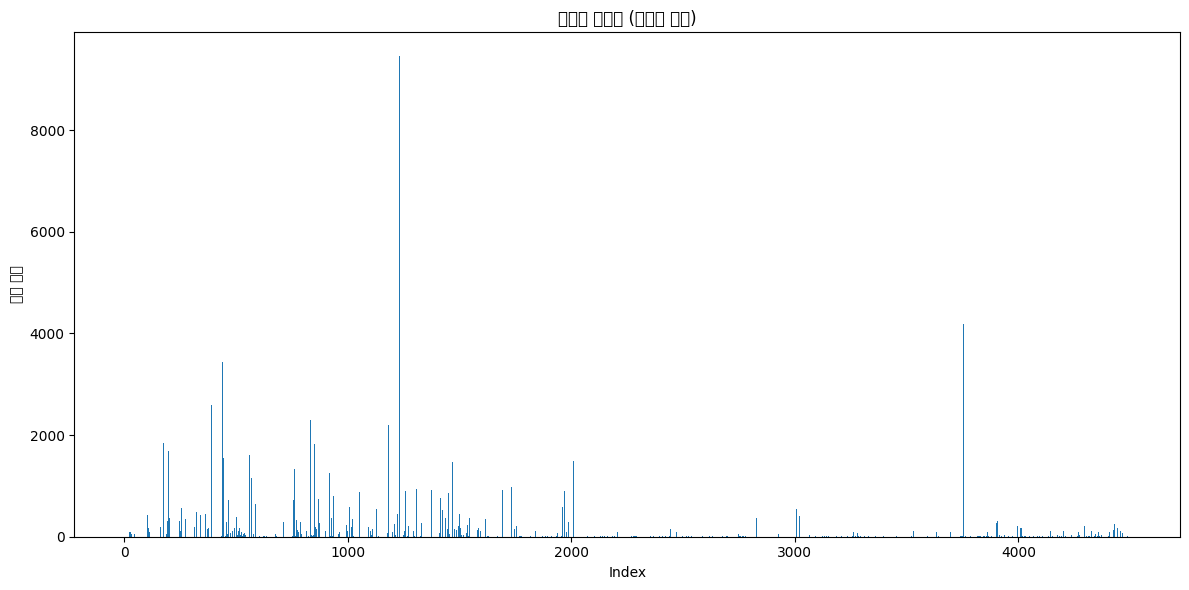

In [ ]:
import matplotlib.pyplot as plt
# 목차 길이 계산
filtered_data = x_contents[['ISBN', '목차']].copy()
filtered_data['목차_len'] = filtered_data['목차'].str.len()

# 인덱스 순서로 목차 길이만 시각화
plt.figure(figsize=(12, 6))
plt.bar(filtered_data.index, filtered_data['목차_len'])  # 인덱스를 x축으로
plt.xlabel('Index')
plt.ylabel('목차 길이')
plt.title('목차당 글자수 (인덱스 순서)')
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250311_semifinal.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49340 non-null  int64 
 1   ISBN        49340 non-null  int64 
 2   분류          48549 non-null  object
 3   제목          49340 non-null  object
 4   부제          32777 non-null  object
 5   저자          49340 non-null  object
 6   발행자         49340 non-null  object
 7   발행일         49340 non-null  object
 8   페이지         49340 non-null  int64 
 9   가격          49340 non-null  int64 
 10  표지          49340 non-null  object
 11  책소개         48741 non-null  object
 12  저자소개        37529 non-null  object
 13  목차          44838 non-null  object
 14  출판사리뷰       28964 non-null  object
 15  추천사         521 non-null    object
dtypes: int64(4), object(12)
memory usage: 6.0+ MB


In [ ]:
x_contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    4502 non-null   int64 
 1   url     4168 non-null   object
 2   목차      979 non-null    object
dtypes: int64(1), object(2)
memory usage: 105.6+ KB


In [ ]:
df.loc[(df['목차'].isna()) & (df['ISBN'].isin(x_contents['ISBN'])),'목차'] = df.loc[(df['목차'].isna()) & (df['ISBN'].isin(x_contents['ISBN'])),'ISBN'].map(x_contents.set_index('ISBN')['목차'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49340 non-null  int64 
 1   ISBN        49340 non-null  int64 
 2   분류          48549 non-null  object
 3   제목          49340 non-null  object
 4   부제          32777 non-null  object
 5   저자          49340 non-null  object
 6   발행자         49340 non-null  object
 7   발행일         49340 non-null  object
 8   페이지         49340 non-null  int64 
 9   가격          49340 non-null  int64 
 10  표지          49340 non-null  object
 11  책소개         48741 non-null  object
 12  저자소개        37529 non-null  object
 13  목차          45817 non-null  object
 14  출판사리뷰       28964 non-null  object
 15  추천사         521 non-null    object
dtypes: int64(4), object(12)
memory usage: 6.0+ MB


In [ ]:
45817-44838

979

In [ ]:
df.to_csv('/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250318_semifinal(filled_contents).csv', index=False)

In [19]:
df = pd.read_csv("/content/drive/MyDrive/aiffel_final_project/data_renew/aiffel_book_250318_semifinal(filled_contents).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49340 non-null  int64 
 1   ISBN        49340 non-null  int64 
 2   분류          48549 non-null  object
 3   제목          49340 non-null  object
 4   부제          32777 non-null  object
 5   저자          49340 non-null  object
 6   발행자         49340 non-null  object
 7   발행일         49340 non-null  object
 8   페이지         49340 non-null  int64 
 9   가격          49340 non-null  int64 
 10  표지          49340 non-null  object
 11  책소개         48741 non-null  object
 12  저자소개        37529 non-null  object
 13  목차          45817 non-null  object
 14  출판사리뷰       28964 non-null  object
 15  추천사         521 non-null    object
dtypes: int64(4), object(12)
memory usage: 6.0+ MB


In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [32]:
df[df['분류'].astype(str).apply(len) > 75]['분류']

,분류
1,"['국내도서 > 고등학교참고서 > 고등-문제집 > 수학영역', '국내도서 > 고등학교참고서 > 고등학교 출판사별 > 지학사 > 풍산자 라이트']"
9,"['국내도서 > 소설/시/희곡 > 역사소설', '국내도서 > 소설/시/희곡 > 한국소설 > 2000년대 이전 한국소설', '국내도서 > 소설/시/희곡 > 테마문학 > 영화소설', '국내도서 > 소설/시/희곡 > 테마문학 > 드라마 소설']"
11,"['국내도서 > 소설/시/희곡 > 역사소설', '국내도서 > 소설/시/희곡 > 한국소설 > 2000년대 이전 한국소설', '국내도서 > 소설/시/희곡 > 테마문학 > 영화소설', '국내도서 > 소설/시/희곡 > 테마문학 > 드라마 소설']"
12,"['국내도서 > 소설/시/희곡 > 역사소설', '국내도서 > 소설/시/희곡 > 한국소설 > 2000년대 이전 한국소설', '국내도서 > 소설/시/희곡 > 테마문학 > 영화소설', '국내도서 > 소설/시/희곡 > 테마문학 > 드라마 소설']"
13,"['국내도서 > 소설/시/희곡 > 역사소설', '국내도서 > 소설/시/희곡 > 한국소설 > 2000년대 이전 한국소설', '국내도서 > 소설/시/희곡 > 테마문학 > 영화소설', '국내도서 > 소설/시/희곡 > 테마문학 > 드라마 소설']"
...,...
49323,"['국내도서 > 중학교참고서 > 중2-문제집 > 수학(중등2)', '국내도서 > 중학교참고서 > 중학교 출판사별 > 디딤돌 > 최상위수학(중등) > 최상위라이트']"
49331,"['국내도서 > 어린이 > 과학/수학/컴퓨터 > _컴퓨터와 코딩', '국내도서 > 컴퓨터/모바일 > 초중고 소프트웨어 교육/코딩 > 초등', '국내도서 > 컴퓨터/모바일 > 초중고 소프트웨어 교육/코딩 > 중등']"
49337,"['국내도서 > 중학교참고서 > 중1-문제집 > 수학(중등1)', '국내도서 > 중학교참고서 > 중학교 출판사별 > 디딤돌 > 최상위수학(중등) > 최상위라이트']"
49338,"['국내도서 > 중학교참고서 > 중3-문제집 > 수학(중등3)', '국내도서 > 중학교참고서 > 중학연산/도형', '국내도서 > 중학교참고서 > 중학교 출판사별 > 디딤돌 > 중학연산']"


In [35]:
df[df['목차'].astype(str).apply(len) > 3000]['목차']

47                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [28]:
df['분류'].astype(str).apply(len).describe()

,분류
count,49340.000000
mean,58.115059
std,41.536051
min,3.000000
25%,32.000000
50%,46.000000
75%,72.000000
max,1081.000000


In [24]:
df['저자소개'].astype(str).apply(len).describe()

,저자소개
count,49340.000000
mean,382.540130
std,553.975459
min,3.000000
25%,19.000000
50%,243.000000
75%,536.000000
max,10000.000000


In [23]:
df['목차'].astype(str).apply(len).describe()

,목차
count,49340.000000
mean,818.626996
std,1304.037481
min,1.000000
25%,117.000000
50%,413.000000
75%,992.000000
max,10000.000000


In [25]:
df['책소개'].astype(str).apply(len).describe()

,책소개
count,49340.000000
mean,442.129246
std,383.645719
min,1.000000
25%,166.000000
50%,341.000000
75%,609.000000
max,8885.000000


In [26]:
df['출판사리뷰'].astype(str).apply(len).describe()

,출판사리뷰
count,49340.000000
mean,816.720490
std,1168.669151
min,1.000000
25%,3.000000
50%,352.000000
75%,1239.000000
max,13872.000000


In [27]:
df['추천사'].astype(str).apply(len).describe()

,추천사
count,49340.000000
mean,11.358208
std,105.614908
min,3.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,4620.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


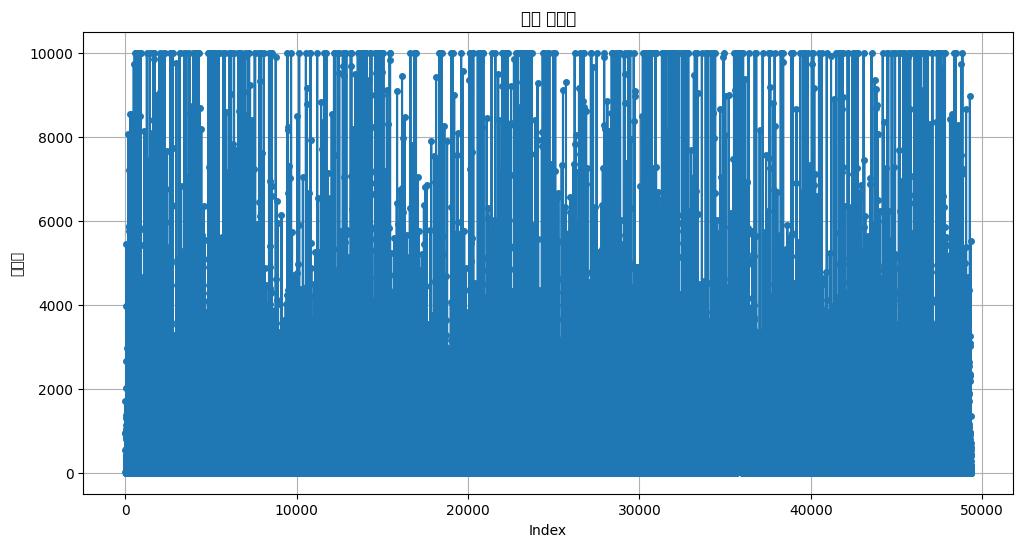

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['목차'].astype(str).apply(len), marker='o', linestyle='-', markersize=4)
plt.xlabel('Index')
plt.ylabel('글자수')
plt.title('목차 글자수')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

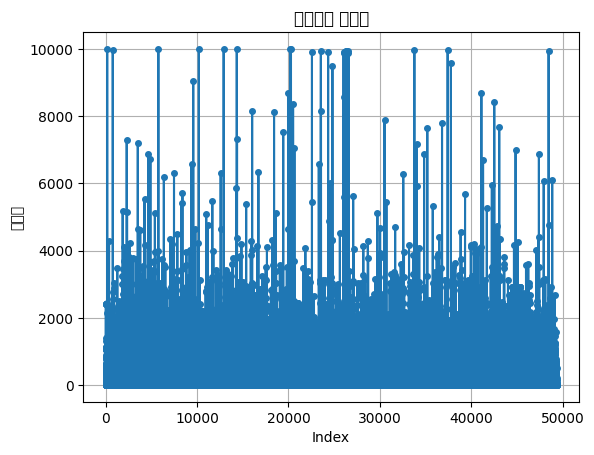

In [11]:
plt.plot(df.index, df['저자소개'].astype(str).apply(len), marker='o', linestyle='-', markersize=4)
plt.xlabel('Index')
plt.ylabel('글자수')
plt.title('저자소개 글자수')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52293 (\N{HANGUL SYLLABLE CAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

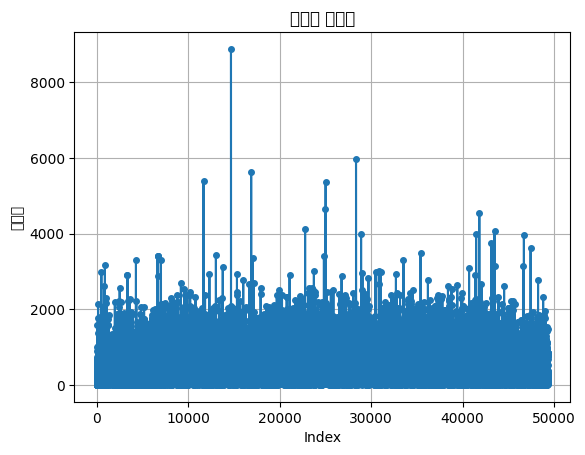

In [12]:
plt.plot(df.index, df['책소개'].astype(str).apply(len), marker='o', linestyle='-', markersize=4)
plt.xlabel('Index')
plt.ylabel('글자수')
plt.title('책소개 글자수')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

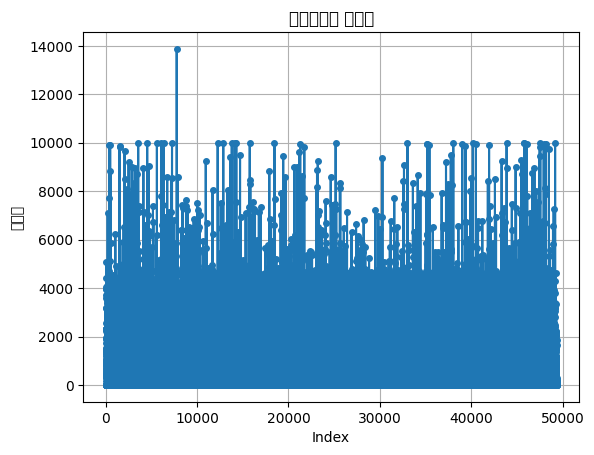

In [14]:
plt.plot(df.index, df['출판사리뷰'].astype(str).apply(len), marker='o', linestyle='-', markersize=4)
plt.xlabel('Index')
plt.ylabel('글자수')
plt.title('출판사리뷰 글자수')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

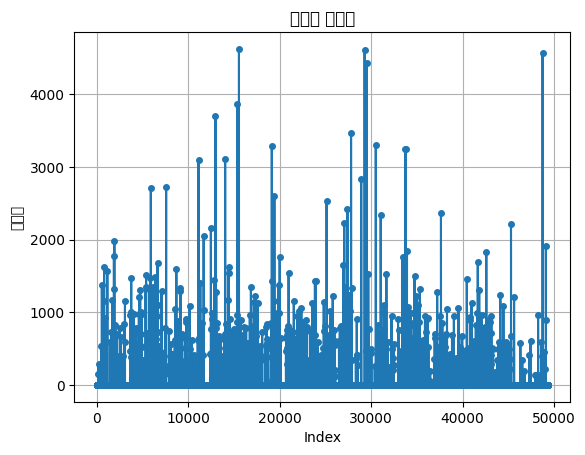

In [16]:
plt.plot(df.index, df['추천사'].astype(str).apply(len), marker='o', linestyle='-', markersize=4)
plt.xlabel('Index')
plt.ylabel('글자수')
plt.title('추천사 글자수')
plt.grid(True)
plt.show()